오직 성령이 너희에게 임하시면 너희가 권능을 받고 예루살렘과 온 유대와 사마리아와 땅 끝까지 이르러 내 증인이 되리라 하시니라 (행1:8)

-------


<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

On my honour, I pledge that I have neither received nor provided improper assistance  
in the completion of this assignment.  
Signed: 최윤영 Student Number: 22100748   

<b style="font-size:30px"> 신경망을 내 손으로 만져보기 </b>   
<b style="font-size:24px"> 제 1 강 Gate 인공신경망(ANN)</b>


# AND 연산 

AND 연산은 모두 입력이 참일 때, 참을 결과로 출력하는 연산입니다.  다음의 진리표에 표시된 바와 같습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/truthtable.png?raw=true" width="400"></center>
<center>그림 1:  OR, AND, NAND, XOR 진리표 </center>


이를 넘파이 배열로 나타내면 다음과 같습니다.  

In [1]:
import numpy as np
x = np.array([[0,0],[0,1],[1,0],[1,1]]) 
y = np.array([[0],[0],[0],[1]])
print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


기계 학습의 관점으로 AND 로직 연산을 바라보면, 입력은 두 개 특성($x_1, x_2$)을 가지고 있으며, 네 개의 샘플이 있으며, 따라서 네 개의 각 샘플에 대한 레이블(혹은 타깃)이 있습니다. 이러한 샘플들과 레이블이 곧 퍼셉트론의 훈련 데이터셋이 됩니다. 

우리는 사실상 위에서 훈련 데이터셋을 준비한 것입니다. 테스트 혹은 예측을 위한 데이터셋은 존재하지 않으므로, 입력 데이터셋을 그대로 테스트를 위해서도 사용할 것입니다. 

다음은 데이터셋의 샘플 갯수와 레이블 갯수가 같은지 점검하고, 샘플 갯수와 에폭을 설정합니다. 

In [2]:
assert len(x) == len(y)
samples = len(x)
epochs = 1000

모델을 학습시키기 전에, 가중치와 편향도 정규 분포를 가지는 난수로 초기화 해줍니다. 또한, 학습률(eta)은 0.1로 설정하였습니다.  입력값(특성)이 두개이므로, 가중치도 각각에 맞춰서 두개를 선언해줍니다.

In [6]:
w = np.array([1.0,1.0])                 # w1, w2
b = np.array([1.0])                 # b
eta = 0.1                          # 학습률(learning rate)

이제 학습을 시켜보겠습니다. 앞에서 만든 편향을 가진 뉴런처럼 코드를 구성하면 됩니다. 각각 네가지 경우를 한번씩 학습할 때마다, 네가지 를 예측한 값과 실제 값의 차이로 계산할 수 있는 SSE(sum of squared error)를 구해서 살펴보겠습니다.

In [4]:
def activation(x):  
    return 1/(1+np.exp(-x))         # sigmoid function

In [8]:
for i in range(epochs): 
    sse_i = 0 
    for j in range(samples): 
        z = np.sum(x[j]*w)+b       # net input
        a = activation(z)               # apply activation function
        error = y[j]-a             # error
        w += eta*error*x[j]      # new weight
        b += eta*error*1            # new bias
        sse_i += error*error
    if (i + 1) % 100 == 0: 
        print(i + 1, sse_i / 100)

print(w)
print(b)

100 [7.81023418e-05]
200 [6.63286372e-05]
300 [5.70036649e-05]
400 [4.94971142e-05]
500 [4.33681788e-05]
600 [3.83013341e-05]
700 [3.40660702e-05]
800 [3.04909107e-05]
900 [2.74462187e-05]
1000 [2.48325581e-05]
[6.98823409 6.9851074 ]
[-10.64790991]


이러한 학습을 통해서 결정된 것은 무엇입니까? 

모델의 가중치와 편향입니다.  

이제 학습을 통해서 얻은 기계 학습 모델에 새로운 데이터를 제공하여 출력을 예측하고자 합니다. 다만, 여기서는 예측에 사용할 데이터가 없으므로, 학습에 이미 사용한 데이터를 사용하여 각각의 케이스를 예측하는 것이 합당합니다. 이를 계산하는 방법은 다음과 같이 퍼셉트론의 __순입력(z)__를 구하고 이를 __활성화 함수에 적용하면__ 예측값을 계산할 수 있습니다. __즉 모델의 순뱡향(forpass)만 계산하면 예측값을 산출할 수 있습니다.__ 이러한 두 연산을 합하여 forpass() 메소드로 구현합니다. 
```
z = np.sum(x[i] * w) + b 
a = activation(z)
```

In [16]:
for i in range(samples): 
    print('{} {} y_hat:{}'.format(x[i], y[i], activation(np.sum(x[i]*w)+b)))

[1. 1.] [1.] y_hat:[0.99997728]
[1. 0.] [1.] y_hat:[0.97979667]
[0. 1.] [1.] y_hat:[0.97972554]
[0. 0.] [0.] y_hat:[0.05054725]


위와 같이, 실제로 1이 나와야하는 값은 1에 가깝게, 0에 가까워야하는 값은 0에 가깝게 예측이 되었습니다. `[0 0]` 케이스의 경우에는 다른 케이스들 보다 더 0에 가까운걸로 보아 더 확실한 케이스라는 점을 알 수 있습니다.

# OR 연산

OR 연산은 입력들 중에 하나라도 참이면, 참을 결과로 출력하는 연산입니다.  이를 넘파이 배열로 나타내면 다음과 같습니다. 

In [17]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]], "float32") 
y = np.array([[1], [1], [1], [0]],  "float32")

w = np.array([1.0, 1.0])            # w1, w2
b = np.array([1.0])                 # b 
eta = 0.1                           # 학습률(learning rate)

이를 AND와 같은 가중치, 편향, 학습률 및 학습 모델로 학습을 시키면 다음과 같습니다. 

In [18]:
for i in range(epochs): 
    sse_i = 0 
    for j in range(samples): 
        z = np.sum(x[j]*w)+b       # net input
        a = activation(z)               # apply activation function
        error = y[j]-a             # error
        w += eta*error*x[j]      # new weight
        b += eta*error*1            # new bias
        sse_i += error*error
    if (i + 1) % 100 == 0: 
        print(i + 1, sse_i / 100)

print(w)
print(b)

100 [0.00141742]
200 [0.00059027]
300 [0.0003127]
400 [0.00019075]
500 [0.00012751]
600 [9.08519009e-05]
700 [6.78295892e-05]
800 [5.24802686e-05]
900 [4.1759897e-05]
1000 [3.39897801e-05]
[6.81447469 6.81088776]
[-2.93297723]


학습을 진행할 수록 error값의 합이 0에 가까워지는것을 확인할 수 있습니다. 각각의 케이스들을 해당 가중치와 편향으로 예측해보겠습니다.

In [19]:
for i in range(samples): 
    print('{} {} y_hat:{}'.format(x[i], y[i], activation(np.sum(x[i]*w)+b)))

[1. 1.] [1.] y_hat:[0.99997728]
[1. 0.] [1.] y_hat:[0.97979667]
[0. 1.] [1.] y_hat:[0.97972554]
[0. 0.] [0.] y_hat:[0.05054725]


# XOR 연산
XOR은 AND나 OR연산과는 다르게 홀수 개의 입력이 참일 때, 결과가 참이 됩니다. 입력을 두개라고 한다면, 위의 진리표에 나타난 바와 같습니다.

이를 넘파이 배열로 나타내면 다음과 같습니다. 

In [20]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]],  "float32") 
y = np.array([[0], [1], [1], [0]],  "float32")

w = np.array([1.0, 1.0])            # w = tf.random.normal([2], 0, 1)         # mean = 0, std dev = 1
b = np.array([1.0])                 # b = tf.random.normal([1], 0, 1) 
eta = 0.1                           # 학습률(learning rate)

이를 AND와 같은 가중치, 편향, 학습률 및 학습 모델로 학습을 시키면 다음과 같습니다. 

In [23]:
for i in range(epochs): 
    sse_i = 0 
    for j in range(samples): 
        z = np.sum(x[j] * w) + b        # net input
        a = activation(z)               # apply activation function
        error = y[j][0] - a             # error
        w = w + eta * error * x[j]      # new weight
        b = b + eta * error             # new bias
        sse_i += error * error
    if (i + 1) % 100 == 0: 
        print(i + 1, sse_i / 100)

print(w)
print(b)

100 [0.01051928]
200 [0.01051928]
300 [0.01051928]
400 [0.01051928]
500 [0.01051928]
600 [0.01051928]
700 [0.01051928]
800 [0.01051928]
900 [0.01051928]
1000 [0.01051928]
[5.12817632e-02 2.93515212e-15]
[-3.43475248e-15]


위와 같이, 특정 학습 지점부터 에러 값에 변화가 거의 없습니다. 이것이 과연 학습이 잘된걸까요? 계산된 가중치와 편향을 가지고 각 케이스를 계산해보았습니다.

In [24]:
for i in range(samples): 
    print('{} {} y_hat:{}'.format(x[i], y[i], activation(np.sum(x[i] * w) + b)))

[1. 1.] [0.] y_hat:[0.51281763]
[1. 0.] [1.] y_hat:[0.51281763]
[0. 1.] [1.] y_hat:[0.5]
[0. 0.] [0.] y_hat:[0.5]


위와 같이, 결과가 0 혹은 1에 가까운 값이 나와 하지만, 모든 케이스가 0.5에 가깝게 나오고 있습니다. 이것은 원하던 결과가 아닙니다. 결과를 해석해보자면, 가중치와 편향 값은 모두 케이스 순서에 의존적이 된다는 것을 알 수 있습니다. 먼저 들어간 `[1 1]`이라는 케이스가 네번째에 들어가는 `[0 0]`이라는 케이스보다 영향을 준다는 것입니다. `[1 1]`이라는 케이스가 먼저 들어가서 가중치와 편향에 중대한 영향을 미치고 이 값들을 가지고 학습을 진행한다는 것이 문제입니다.

그러면 XOR문제는 풀지 못하는 걸까요? 여러 층의 퍼셉트론을 사용하면 해결이 됩니다.

# 단층 퍼셉트론에서의 XOR 문제점

인공 신경망에서는 단층 퍼셉트론으로 XOR 연산이 불가능하다는 것은 마빈 민스키 등에 의해서 밝혀졌습니다. 이러한 내용이 밝혀지면서 인공지능의 겨울이 찾아왔었습니다. 그야말로 전설같은 이야기로 잘 알려져 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-history.jpg?raw=true" width="900"></center>
<center>그림 2: XOR 문제와 인공 지능의 발전사</center>

인공 신경망(ANN, Aritificial Neural Networks)은 1943년 신경생리학자 Warren McCulloch과 수학자 Walter Pitts가 'A Logical Calculus of Ideas Immanent In Nervous Activity' 처음 소개했습니다. 그 이후 1960년대까지 당싱에 등장한 인공 신경망을 통해 사람들은 지능을 가지 기계가 상당히 엄청난 일을 해낼 것이라 생각했습니다. 그러나, 위의 그림(출처: [beamandrew's blog](https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html))처럼 사람들의 기대와는 달리 인공 신경망으로 XOR문제를 해결할 수 없게 되었고, 인공 지능과 관련한 연구는 암흑기로 접어 들게 되었다. 그래도, 1990년 대에는 SVM과 성능이 좋은 다른 머신러닝 알고리즘들이 나올 정도도 꾸준한 연구가 진행은 되고 있었습니다. 

2000년대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었습니다. 이렇게 인공 신경망에 기반을 둔 딥러닝이 다시 주목받게 된 계기가 되었습니다. 

인공 지능의 발전사에서 약간의 의미가 있었던 XOR 문제를 아래 그림과 같은 다층 신경망을 통해 이제 어렵지 않게 풀어볼 수 있는 문제가 되었습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-xor.png?raw=true" width="600"></center>
<center>그림 3:  XOR 연산을 위한 다층 인공 신경망</center>

# Exercises 

## 로직 게이트 클래스 만들기 

AND, NAND, OR, NOR 게이트 로직을 다룰 수 있는 Gate라는 클래스를 만들고 출력을 확인하십시오. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/truthtable.png?raw=true" width="400"></center>
<center>그림 1:  OR, AND, NAND, XOR 진리표 </center>

### Part 1:  Gate 클래스 정의하기 (sse 인스턴스 변수와 코드 포함)

__Solution:__

In [34]:
import numpy as np

class Gate:
    def __init__(self):
        self.w = np.array([1.0, 1.0])         
        self.b = np.array([1.0]) 
        self.eta = 0.1

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        a = self.activation(z)
        return a

    def backprop(self, x, error): 
        w_grad = self.eta*x*error
        b_grad = self.eta*1*error
        return w_grad, b_grad
    
    def activation(self, z): 
        a = 1/(1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 1000):                    # default epochs = 1000
        self.sse = np.zeros(epochs)
        self.epochs=epochs
        for i in range(epochs):                            # epoch만큼 반복합니다. 
            self.sse_i=0
            for x_i,y_i in zip(x,y):
                y_hat = self.forpass(x_i)             
                error = y_i - y_hat                        
                w_grad, b_grad = self.backprop(x_i, error)
                self.w += w_grad                           
                self.b += b_grad                           
                self.sse_i += pow(error,2)                  
            self.sse[i] = self.sse_i

__입력 x와 y_and, y_nand, y_or, y_xor 레이블(타깃)을 정의하기__

In [35]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y_and  = np.array([[0], [0], [0], [1]])
y_nand = np.array([[1], [1], [1], [0]])
y_or   = np.array([[0], [1], [1], [1]])
y_nor  = np.array([[1], [0], [0], [0]])

### Part 2: gate_and 객체와 훈련하기  (epochs = 500)

- gate_and 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

__Expected Output:__  
```
AND Gate
Weight: [4.31247748 4.30140545]
  Bias: [-6.6310874]
[0 0] [0] y_hat:[0.00131699]
[0 1] [0] y_hat:[0.08869437]
[1 0] [0] y_hat:[0.08959338]
[1 1] [1] y_hat:[0.87897885]
```
__Solution:__

In [36]:
gate_and  = Gate()
gate_and.fit(x,y_and,epochs=500)
mse = gate_and.sse/len(x)          # get mse from sse

print("AND Gate")
print("Weight:", gate_and.w)
print("  Bias:", gate_and.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_and[i], activation(np.sum(x[i] * gate_and.w) + gate_and.b)))

AND Gate
Weight: [4.31247748 4.30140545]
  Bias: [-6.6310874]
[0 0] [0] y_hat:[0.00131699]
[0 1] [0] y_hat:[0.08869437]
[1 0] [0] y_hat:[0.08959338]
[1 1] [1] y_hat:[0.87897885]


### Part 3: epoch에 따른 mse 시각화 하기

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/ai4all-gate-mse.png?raw=true" width="400"></center>
<center>그림 4: Gradient Descent MSE for Logic Gate</center>

__Solution:__

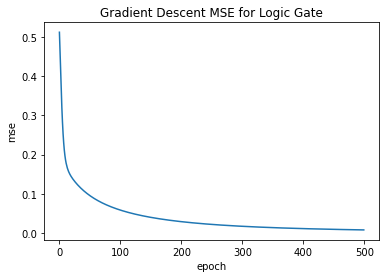

In [38]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(gate_and.epochs)],mse)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('Gradient Descent MSE for Logic Gate')
plt.show()

### Part 4: NAND Gate

- gate_nand 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

__Expected Output:__  
```
NAND Gate
Weight: [-4.25914936 -4.24781832]
  Bias: [6.55111244]
[0 0] [1] y_hat:[0.99857351]
[0 1] [1] y_hat:[0.90914949]
[1 0] [1] y_hat:[0.90820923]
[1 1] [0] y_hat:[0.12391631]
```

__Solution:__

In [40]:
gate_nand  = Gate()
gate_nand.fit(x,y_nand,epochs=500)
mse = gate_nand.sse/len(x)          # get mse from sse

print("NAND Gate")
print("Weight:", gate_nand.w)
print("  Bias:", gate_nand.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_nand[i], activation(np.sum(x[i] * gate_nand.w) + gate_nand.b)))

NAND Gate
Weight: [-4.25914936 -4.24781832]
  Bias: [6.55111244]
[0 0] [1] y_hat:[0.99857351]
[0 1] [1] y_hat:[0.90914949]
[1 0] [1] y_hat:[0.90820923]
[1 1] [0] y_hat:[0.12391631]


### Part 4: OR Gate

- gate_or 객체를 생성하기
- 훈련하기
- mse 오차 구하기 
- 모델의 결과와 예측을 출력하기 

__Expected Output:__  
```
OR Gate
Weight: [5.42570445 5.43193129]
  Bias: [-2.21461759]
[0 0] [0] y_hat:[0.09844548]
[0 1] [1] y_hat:[0.96148065]
[1 0] [1] y_hat:[0.96124937]
[1 1] [1] y_hat:[0.99982368]
```
__Solution:__

In [42]:
gate_or  = Gate()
gate_or.fit(x,y_or,epochs=500)
mse = gate_or.sse/len(x)          # get mse from sse

print("OR Gate")
print("Weight:", gate_or.w)
print("  Bias:", gate_or.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_or[i], activation(np.sum(x[i] * gate_or.w) + gate_or.b)))

OR Gate
Weight: [5.42570445 5.43193129]
  Bias: [-2.21461759]
[0 0] [0] y_hat:[0.09844548]
[0 1] [1] y_hat:[0.96148065]
[1 0] [1] y_hat:[0.96124937]
[1 1] [1] y_hat:[0.99982368]


#### Part 4: NOR gate

- gate_nor 객체를 생성하기
- 훈련하기
- mse 구하기 
- 모델의 결과와 예측을 출력하기 

__Expected Output:__   
```
NOR Gate
Weight: [-5.33364922 -5.34053195]
  Bias: [2.16668323]
[0 0] [1] y_hat:[0.8972175]
[0 1] [0] y_hat:[0.04016179]
[1 0] [0] y_hat:[0.04042795]
[1 1] [0] y_hat:[0.00020191]
```

__Solution:__

In [44]:
gate_nor  = Gate()
gate_nor.fit(x,y_nor,epochs=500)
mse = gate_nor.sse/len(x)          # get mse from sse

print("NOR Gate")
print("Weight:", gate_nor.w)
print("  Bias:", gate_nor.b)
for i in range(len(x)): 
    print('{} {} y_hat:{}'.format(x[i], y_nor[i], activation(np.sum(x[i] * gate_nor.w) + gate_nor.b)))

NOR Gate
Weight: [-5.33364922 -5.34053195]
  Bias: [2.16668323]
[0 0] [1] y_hat:[0.8972175]
[0 1] [0] y_hat:[0.04016179]
[1 0] [0] y_hat:[0.04042795]
[1 1] [0] y_hat:[0.00020191]


-------
__Be joyful always!__ 1 Thes.5:16